
📊 Understanding Credit Risk and Exploratory Data Analysis

🎯 Objective

Gain a foundational understanding of credit risk concepts and conduct exploratory data analysis (EDA) to prepare the dataset for building a Credit Scoring Model.

🛠️ Approach

1️⃣ Understanding Credit Risk

- Conceptual Framework: Study the definition and implications of credit risk, focusing on its importance in financial services and credit scoring models.

- Research Resources: Utilize key literature and academic references to grasp the various approaches to credit scoring, including statistical techniques and historical borrower behavior analysis.

- Regulatory Guidelines: Familiarize with the Basel II Capital Accord to understand the regulatory framework surrounding credit risk assessment and loan default definitions.

2️⃣ Exploratory Data Analysis (EDA)

- Data Overview: Analyze the structure of the provided dataset, including the number of rows, columns, and data types.

- Summary Statistics: Derive insights from summary statistics to understand central tendencies, dispersion, and the overall distribution of key features.

- Feature Distribution: Visualize the distribution of numerical features using histograms or box plots to identify patterns, skewness, and potential outliers in transaction data.

- Categorical Analysis: Examine the distribution of categorical variables to gain insights into borrower demographics and behaviors.

- Correlation Analysis: Investigate relationships between numerical features to identify potential predictors of default risk.

- Missing Data Identification: Identify and document missing values, which will inform imputation or removal strategies.

- Outlier Detection: Utilize box plots or scatter plots to detect outliers that may negatively impact model performance.

3️⃣ Documentation and Reporting

- Reporting Insights: Prepare a comprehensive report summarizing the findings from the EDA, highlighting critical features and their relevance to risk assessment.

4️⃣ Data Preparation for Modeling

- Data Cleaning: Based on EDA, clean the dataset by removing irrelevant features and addressing missing values as determined in the analysis.

✅ Summary of Steps

1. Study and understand credit risk concepts and regulatory guidelines.

2. Conduct exploratory data analysis to analyze dataset structure and distribution.

3. Visualize and interpret key statistical features and relationships.

4. Identify and address missing data and outliers for improved dataset quality.

5. Document findings and prepare the dataset for subsequent modeling tasks.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [4]:
data_path = os.path.join(rpath,'Data','data.csv')
data = pd.read_csv(data_path)
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
data_path = os.path.join(rpath,'Data','Xente_Variable_Definitions.csv')
data_feature = pd.read_csv(data_path)
data_feature

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [6]:
data['TransactionStartTime']=pd.to_datetime(data['TransactionStartTime'], format='mixed')
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


DATA OVERVIEW

In [7]:
data.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [8]:
['ProviderId', 'ProductId','ProductCategory', 'ChannelId']

['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId']

In [9]:
data['ChannelId'].unique().shape

(4,)

In [10]:
data.shape

(95662, 16)

### Data Overview Summary  

The dataset consists of **95,662 rows** and **15 columns**, offering a substantial amount of data for analysis.  

Most data types are appropriately assigned, except for the **TransactionStartTime** column, which is currently stored as an object. Converting it to **datetime** format will enable accurate time-based analysis.  

Additionally, no missing values were found in any columns, ensuring the dataset is **complete** and ready for further analysis without requiring imputation.

Summary Statistics


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

In [12]:
data.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


<function seaborn.categorical.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)>

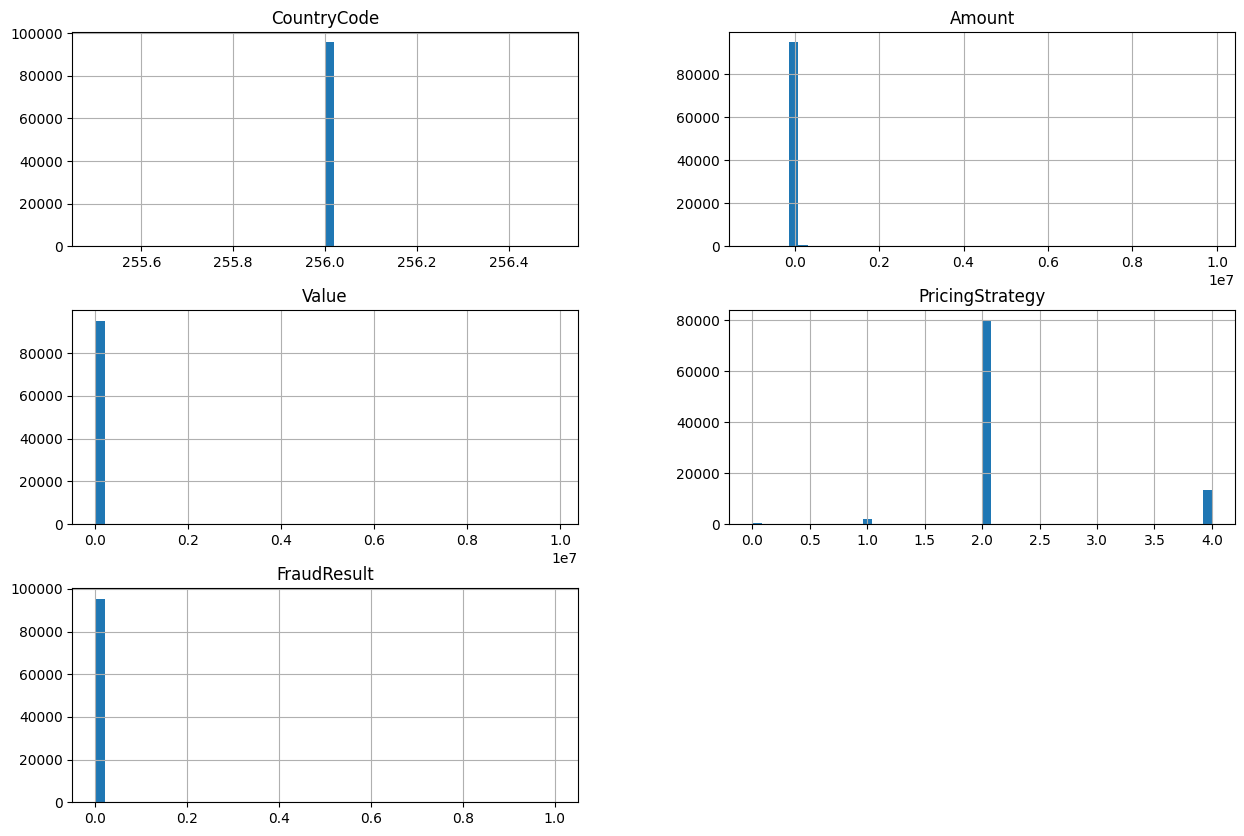

In [13]:
# distribution plots - Histograms
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);
sns.countplot

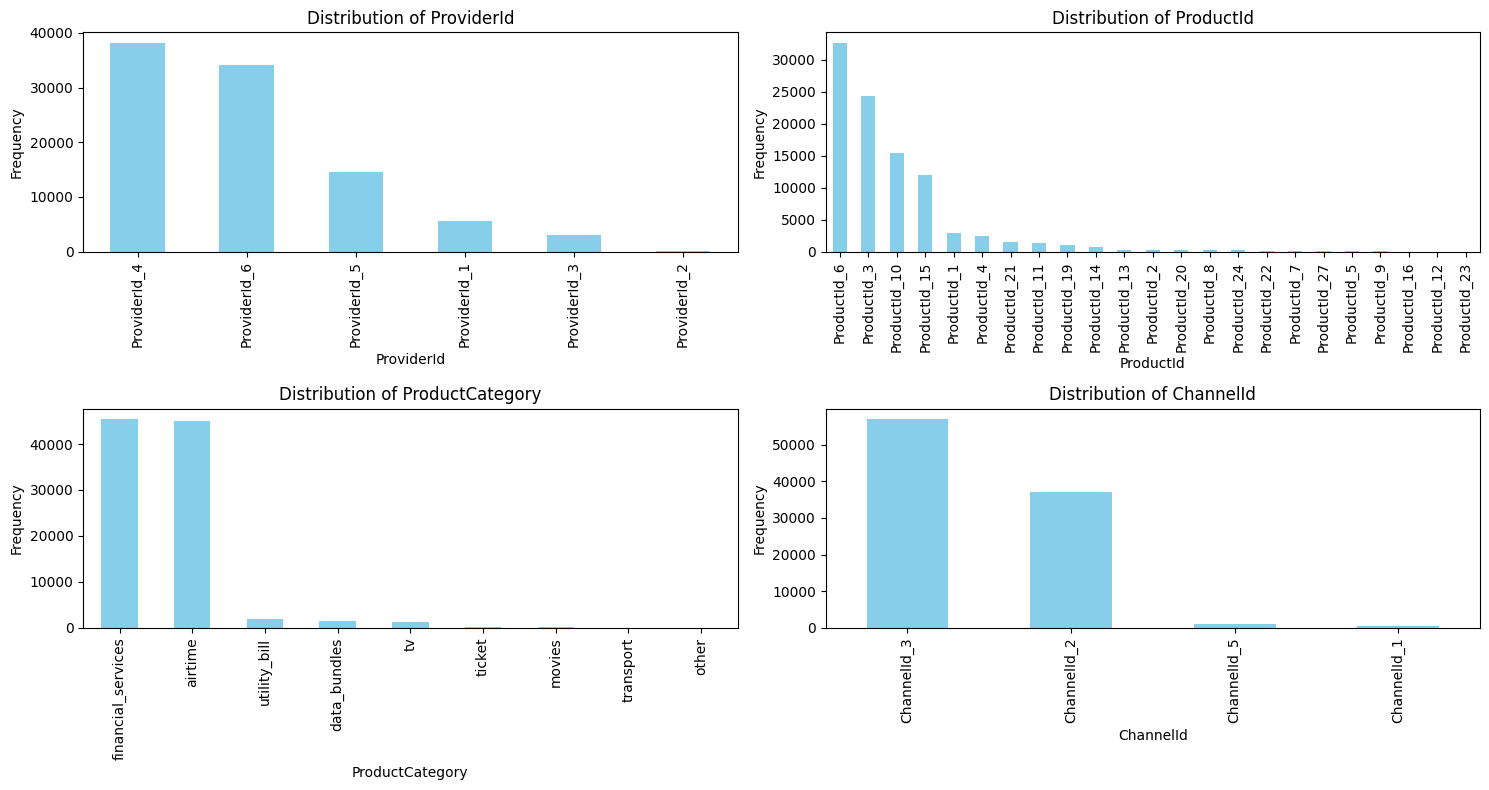

In [14]:
import matplotlib.pyplot as plt

# Select only categorical columns (object) from the DataFrame
df_cat = data[['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId']]

# Define the number of rows and columns for the plot grid
n_rows = (len(df_cat.columns) + 1) // 2  # Adjust rows for a 2-column layout

# Plot bar plots for each categorical column in a 2-column layout
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, n_rows * 4))

# Flatten the axes array to make it easier to loop through
axes = axes.flatten()

# Loop through each categorical column and plot the frequency of each category
for i, column in enumerate(df_cat.columns):
    df_cat[column].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

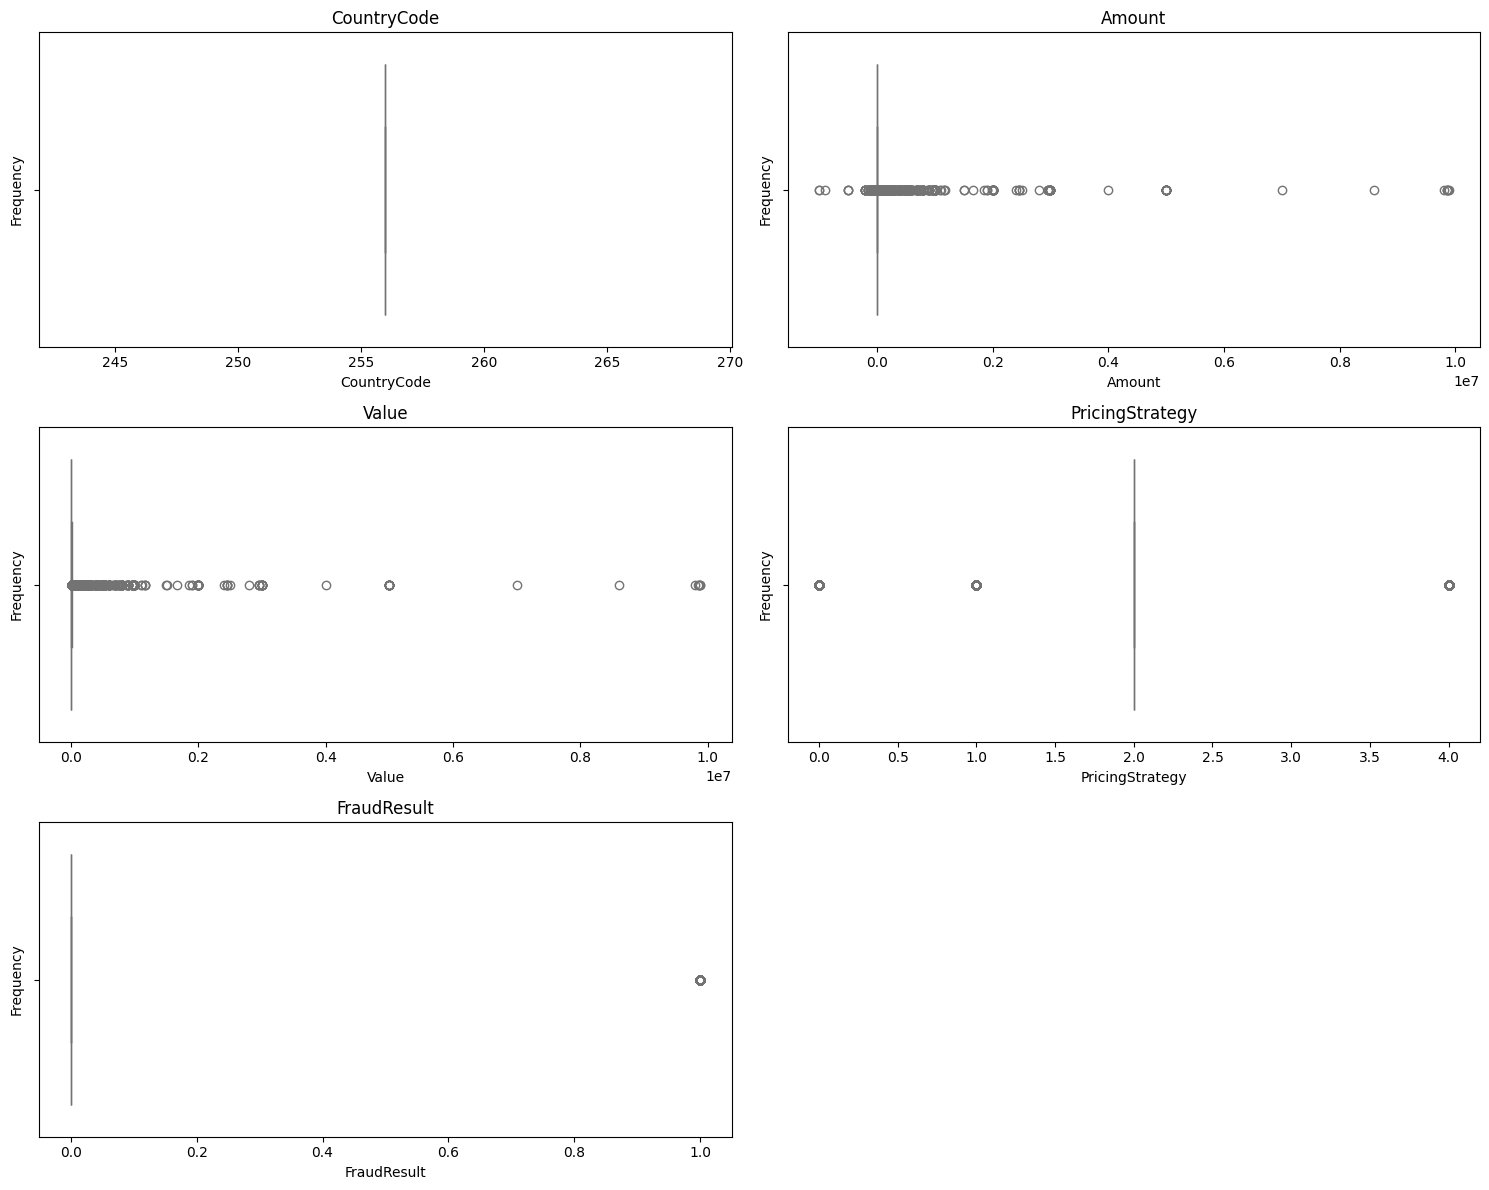

In [15]:
import matplotlib.pyplot as plt

# numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Select only categorical columns (object) from the DataFrame
df_num = data.select_dtypes(include=['float64', 'int64'])

# Define the number of rows and columns for the plot grid
n_rows = (len(df_num.columns) + 1) // 2  # Adjust rows for a 2-column layout

# Plot bar plots for each categorical column in a 2-column layout
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, n_rows * 4))

# Flatten the axes array to make it easier to loop through
axes = axes.flatten()

# Loop through each categorical column and plot the frequency of each category
for i, column in enumerate(df_num.columns):
    # df_num[column].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    sns.boxplot(data=df_num, x=column, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

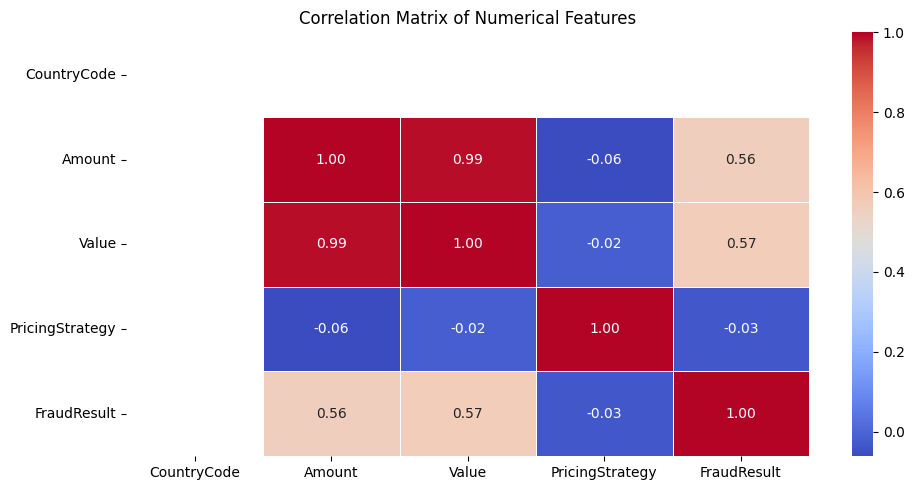

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute and visualize the correlation matrix
def plot_correlation_matrix(df):
    # Select only numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Compute the correlation matrix
    corr_matrix = df[numerical_columns].corr(method='pearson')  # Using Pearson by default

    # Display the correlation matrix as a heatmap
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
    ax.set_title("Correlation Matrix of Numerical Features")

    plt.tight_layout()
    #st.pyplot(fig)

# Call the function to display the correlation matrix
plot_correlation_matrix(data)

In [17]:
data.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64